In [2]:
import seaborn as sns
import pandas as pd
import re
from functools import reduce,partial
import operator
from operator import itemgetter
from itertools import accumulate
%matplotlib inline

In [8]:
df = pd.read_pickle('in-doc-single.pkl')-pd.read_pickle('in-domain.pkl')
df

\textsc{d}\textsc{s}\textsc{r}            \
                 \textsc{c}ore\textsc{nlp}  baseline   
\mlacc                           -0.005911 -0.015976   
\mlutil                           0.001781 -0.000183   
$|\hat{Y}|$                       0.034048  0.237577   

                          \textsc{k}o            \
            \textsc{c}ore\textsc{nlp}  baseline   
\mlacc                      -0.007931 -0.051448   
\mlutil                      0.001908  0.006585   
$|\hat{Y}|$                 -0.037375 -0.212190   

            \textsc{r}\textsc{e}\textsc{n}1            \
                  \textsc{c}ore\textsc{nlp}  baseline   
\mlacc                             0.005584 -0.001560   
\mlutil                            0.015272  0.017106   
$|\hat{Y}|$                       -0.164265 -0.407673   

            \textsc{r}\textsc{e}\textsc{n}14            \
                   \textsc{c}ore\textsc{nlp}  baseline   
\mlacc                             -0.011621 -0.000251   
\mlutil                             0.002112  0.006263   
$|\hat{Y}|$                         0.053571  0.461635   

            \textsc{r}\textsc{e}\textsc{n}19            \
                   \textsc{c}ore\textsc{nlp}  baseline   
\mlacc                              0.011029  0.028200   
\mlutil                             0.013409  0.006557   
$|\hat{Y}|$                        -0.093838  0.173583   

            \textsc{r}\textsc{e}\textsc{n}2            \
                  \textsc{c}ore\textsc{nlp}  baseline   
\mlacc                             0.032051  0.040551   
\mlutil                            0.018032  0.045740   
$|\hat{Y}|$                       -0.472498 -0.685280   

            \textsc{r}\textsc{e}\textsc{n}4            \
                  \textsc{c}ore\textsc{nlp}  baseline   
\mlacc                             0.095578  0.059058   
\mlutil                            0.060134  0.065314   
$|\hat{Y}|$                       -1.122682 -1.364964   

            \textsc{s}\textsc{o}\textsc{s}1            \
                  \textsc{c}ore\textsc{nlp}  baseline   
\mlacc                             0.050277  0.014160   
\mlutil                            0.026599  0.025713   
$|\hat{Y}|$                       -0.437846 -0.452461   

                         \textsc{s}t2            
            \textsc{c}ore\textsc{nlp}  baseline  
\mlacc                      -0.005098 -0.053360  
\mlutil                      0.004701 -0.001741  
$|\hat{Y}|$                  0.034907 -0.097691

In [ ]:
df =

In [91]:
# 10 tags with most absolute errors
# 5 most common mistakes (or 80% of the errors)
accs = {tag: df.iscorrect[df.target.apply(lambda x: tag in x)].mean() for tag, count in tags.items()}
errors = {tag:df.iscorrect[df.target.apply(lambda x: tag in x)].apply(lambda x: not bool(x)).sum() for tag,count in tags.items()}
errors = sorted(errors.items(),key=itemgetter(1),reverse=True)


percent_to_str = lambda x: re.sub(r'(\d+)\.(.*)', r'\\llap{\1}.\\rlap{\2}', f'{x:.2%}'.replace('%', '\%'))
convert_sc = lambda x: re.sub(r'([A-Z]+)', lambda x:f'\\textsc{{{x.group().lower()}}}',x)

total_errs = sum(x[1] for x in errors)
explained_errs = 0
for x in errors[:10]:
    acc = {tag:df.pred[df.target.apply(lambda x_: x[0] in x_)].apply(lambda x_: x_==tag).sum()for tag in tags}
    del acc[x[0]] 
    err = sorted(acc.items(),key=itemgetter(1),reverse=True)
    i = 0
    while sum(map(itemgetter(1),err[:i])) < x[1]*.75:
        i +=1
    i = min(5,i)
    err_s = ', '.join([convert_sc(e[0])+'\,('+str(e[1])+')' for e in err[:i]])
    total_part = sum(map(itemgetter(1),err[:i]))/total_errs
    
    print(convert_sc(x[0]),#percent_to_str(total_part),
          err_s,
          f'{x[1]:,}',
          percent_to_str(accs[x[0]]),
          sep='&',end='\\\\\n')
    explained_errs += sum(map(itemgetter(1),err[:i]))
    
print(f'percent of errors explained: {explained_errs/ total_errs:.2%}')

\textsc{vvfin}.*&\textsc{vvinf}\,(116), \textsc{vvfin}.ind\,(105), \textsc{na}\,(73)&371&\llap{51}.\rlap{68\%}\\
\textsc{na}&\textsc{vvinf}\,(85), \textsc{adja}\,(42), \textsc{vvfin}.*\,(35), \textsc{ne}\,(29)&226&\llap{95}.\rlap{45\%}\\
\textsc{vvfin}.ind&\textsc{vvfin}.*\,(97), \textsc{na}\,(26), \textsc{vvinf}\,(17), \textsc{vafin}.ind\,(13)&204&\llap{56}.\rlap{01\%}\\
\textsc{avd}&\textsc{na}\,(29), \textsc{kon}\,(27), \textsc{pavd}\,(22), \textsc{appr}\,(19), \textsc{adjv}\,(13)&193&\llap{81}.\rlap{42\%}\\
\textsc{vmfin}.*&\textsc{vmfin}.ind\,(140)&152&\llap{73}.\rlap{96\%}\\
\textsc{dds}&\textsc{ddart}\,(64), \textsc{drels}\,(35), \textsc{kous}\,(16)&135&\llap{73}.\rlap{34\%}\\
\textsc{oa}&\textsc{na}\,(35), \textsc{appr}\,(15), \textsc{ne}\,(8), \textsc{xy}\,(8), \textsc{adja}\,(7)&120&\llap{28}.\rlap{57\%}\\
\textsc{vvinf}&\textsc{na}\,(76), \textsc{vvfin}.*\,(30)&119&\llap{85}.\rlap{90\%}\\
\textsc{vafin}.*&\textsc{vafin}.ind\,(49), \textsc{vvfin}.*\,(21), \textsc{vvfin}.ind\,

In [103]:
min_count = 10
accs = {tag: df.iscorrect[df.target.apply(lambda x: tag in x)].mean() for tag, count in tags.items() if
        count >= min_count}
util = {tag: df.const_util[df.target.apply(lambda x: tag in x)].mean() for tag, count in tags.items() if
        count >= min_count}
count = {tag: df.const_util[df.target.apply(lambda x: tag in x)].count() for tag, count in tags.items() if
         count >= min_count}
count = pd.Series(count)/pd.Series(count).sum()
count =count/pd.Series(count).max()

df2 = pd.DataFrame([pd.Series(accs), count], index=['ml-acc', 'frequency']).T.sort_index().stack().unstack(0).unstack(0)
df2 = df2.reset_index()
df2.columns = ['Tag', 'Type', 'Value']
df2

,Tag,Type,Value
0,ADJA,ml-acc,0.885107
1,ADJA,frequency,0.158475
2,ADJA<VVPP,ml-acc,0.722222
3,ADJA<VVPP,frequency,0.008759
4,ADJD,ml-acc,0.643362
...,...,...,...
125,VVPP,frequency,0.106894
126,VVPS,ml-acc,0.629630
127,VVPS,frequency,0.013139
128,XY,ml-acc,0.973535


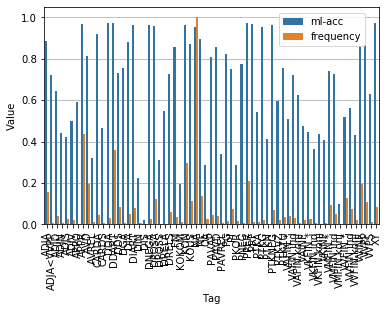

In [112]:
ax = sns.barplot(x='Tag', y='Value',hue= 'Type',data=df2)
ax.tick_params(axis='x', rotation=90)
ax.set_axisbelow(True)
ax.grid(which='both', axis='y')
ax.legend(loc=(.7,.82))

In [179]:
#df2 = pd.DataFrame([pd.Series(accs) ,pd.Series(util) ],index=['acc','util']).T.stack().reset_index()
#df2.columns = ['Tag','Measure', 'Score']
df2 = pd.DataFrame([pd.Series(accs),pd.Series(count)  ],index=['acc','count']).T.sort_index().reset_index()
df2.columns = ['Tag','acc', 'count']

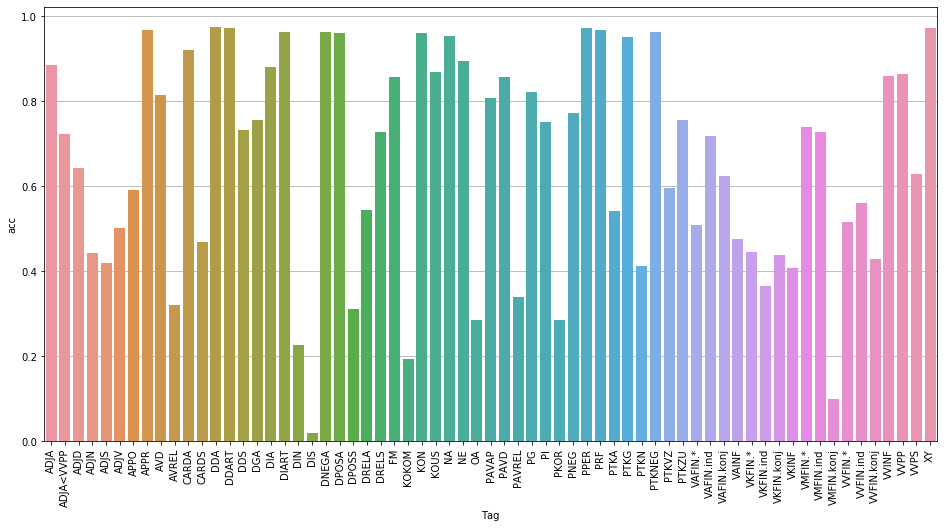

In [184]:
#ax = sns.barplot(x='Tag', y='Score',hue='Measure',data=df2)
ax = sns.barplot(x='Tag', y='acc',data=df2)
ax.tick_params(axis='x',rotation=90)
ax.set_axisbelow(True)
ax.grid(which='both', axis='y')
fig = ax.get_figure()
fig.set_size_inches((16,8))

In [89]:
df['acc'] = df['acc'].apply(
    lambda x: re.sub(r'(\d+)\.(\d+)', r'\\llap{\1}.\\rlap{\2}', '{:0.2%}'.format(x).replace('%', '')))
df['\mlutil'] = df['\mlutil'].apply(
    lambda x: re.sub(r'(\d+)\.(\d+)', r'\\llap{\1}.\\rlap{\2}', '{:0.2%}'.format(x).replace('%', '')))
df['$|\hat{Y}|$'] = df['$|\hat{Y}|$'].apply(
    lambda x: re.sub(r'(\d+)\.(\d+)', r'\\llap{\1}.\\rlap{\2}', '{:0.2f}'.format(x)))
df.columns = '\ml-acc,\ml-util,$|\hat{Y}|$'.split(',')

#with open(outdir + savefile[:-3]+'tex', 'w') as f:
#    df.T.stack(0).to_latex(buf=f, escape=False, multicolumn_format='c', multirow=True,
#                  column_format='l@{ }l' + '@{\enspace}c' * 9,
#                  )

'\\begin{tabular}{l@{ }l@{\\enspace}c@{\\enspace}c@{\\enspace}c@{\\enspace}c@{\\enspace}c@{\\enspace}c@{\\enspace}c@{\\enspace}c@{\\enspace}c}\n\\toprule\n     &          &                135   &                270   &                540   &                810   &                1621  &                2971  &                5403  &                9456  &                13509 \\\\\n\\midrule\n\\multirow{2}{*}{acc} & \\textsc{c}ore\\textsc{nlp} &  \\llap{46}.\\rlap{94} &  \\llap{55}.\\rlap{22} &  \\llap{62}.\\rlap{44} &  \\llap{66}.\\rlap{46} &  \\llap{70}.\\rlap{14} &  \\llap{79}.\\rlap{49} &  \\llap{83}.\\rlap{97} &  \\llap{87}.\\rlap{02} &  \\llap{88}.\\rlap{82} \\\\\n     & baseline &  \\llap{50}.\\rlap{40} &  \\llap{55}.\\rlap{04} &  \\llap{62}.\\rlap{33} &  \\llap{64}.\\rlap{89} &  \\llap{67}.\\rlap{79} &  \\llap{72}.\\rlap{86} &  \\llap{77}.\\rlap{80} &  \\llap{80}.\\rlap{17} &  \\llap{80}.\\rlap{27} \\\\\n\\cline{1-11}\n\\multirow{2}{*}{util} & \\textsc{c}ore\\textsc{nlp} &      